<a href="https://colab.research.google.com/github/AryanilAD/Corporate-Training-Mini_Projects/blob/main/Regression_Model_on_Pima_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Model on Pima-Diabetes dataset using ensemble techniques**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, StackingClassifier

In [ ]:
df=pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Assuming you want to check for outliers in numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the z-score for each numerical column
from scipy.stats import zscore
z_scores = df[numerical_columns].apply(zscore)

# Identify outliers using a threshold (e.g., z-score > 3 or < -3)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print columns with outliers
print(outliers.any())


Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction     True
Age                          True
Outcome                     False
dtype: bool


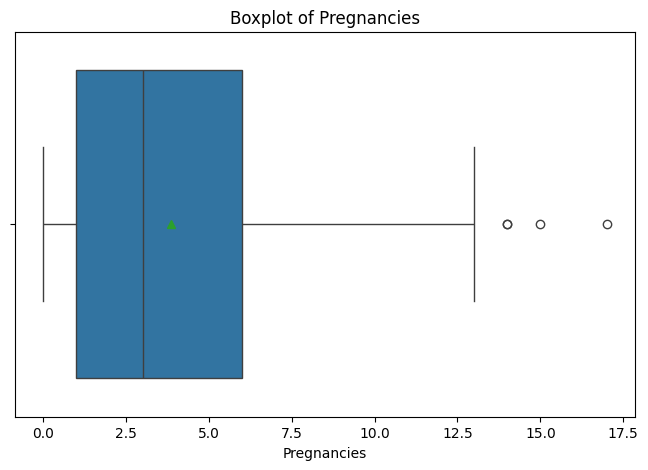

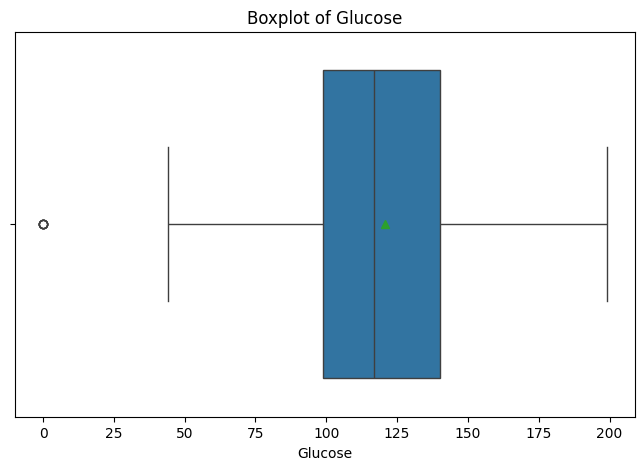

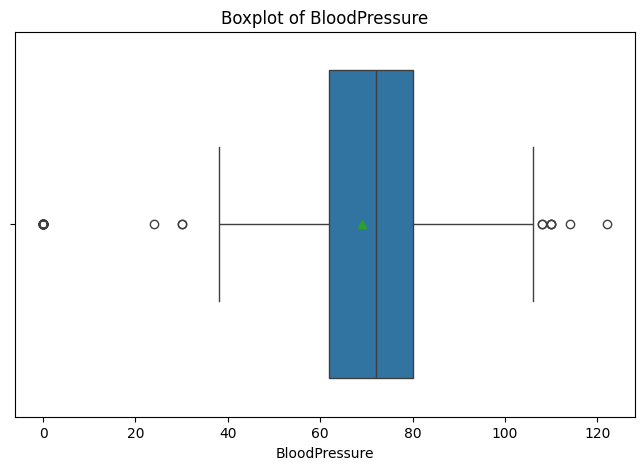

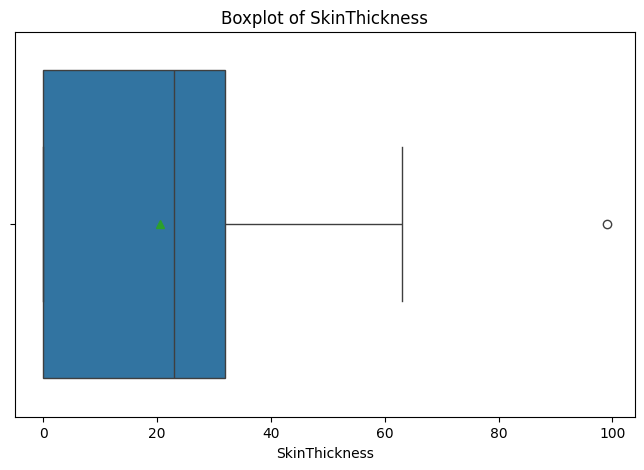

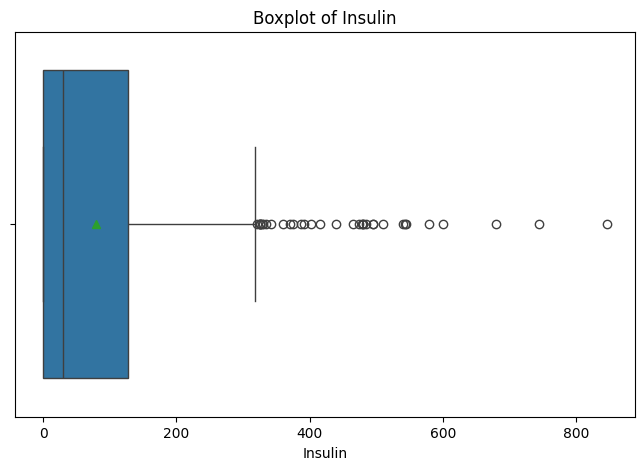

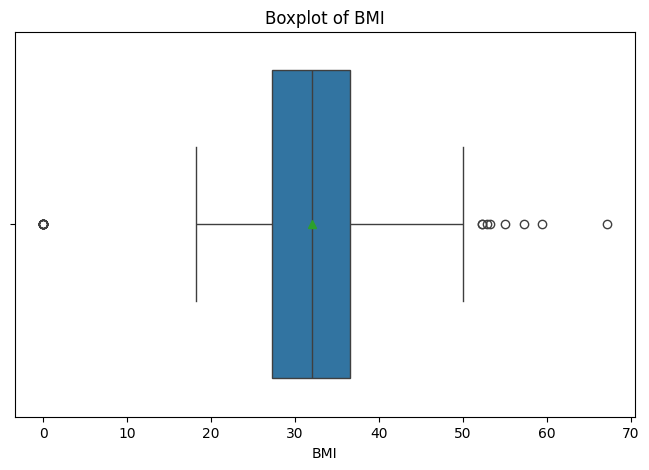

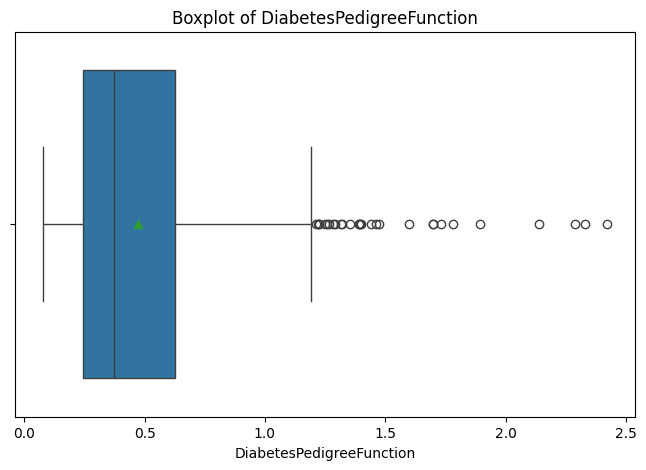

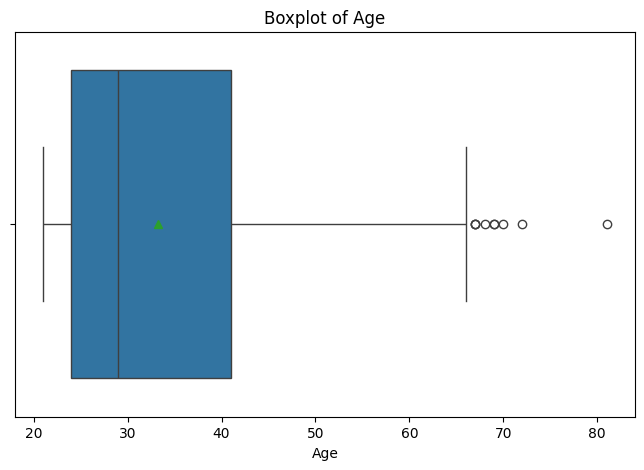

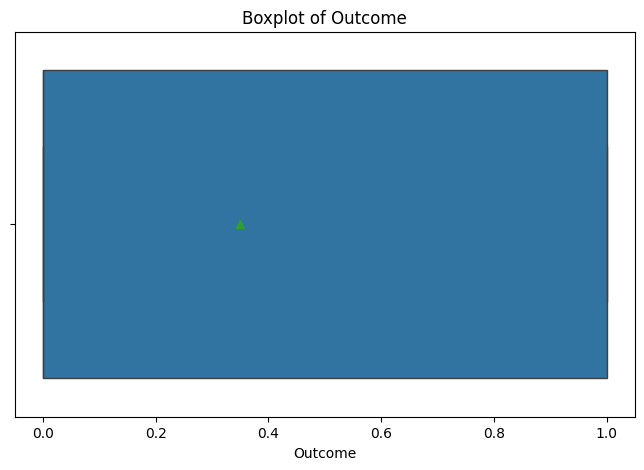

In [ ]:
# Plot boxplots for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 12))
    sns.boxplot(x=df[column], showmeans=True)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model on the training set
model.fit(X_train, y_train)

# Evaluating accuracy on the training set
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Evaluating accuracy on the test set
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7703583061889251
Test Accuracy: 0.7467532467532467


In [ ]:
model = LogisticRegression(max_iter=400)

# Performing K-fold cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculating mean squared error
mean_squared_error = -cv_scores.mean()

# Calculating accuracy during cross-validation
cv_accuracy_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
accuracy = cv_accuracy_scores.mean()

print("Mean Squared Error:", mean_squared_error)
print("Accuracy:", accuracy)

Mean Squared Error: 0.2345848757271285
Accuracy: 0.7654151242728715


In [ ]:
# Building the logistic regression model
lr_model = LogisticRegression(max_iter=400)

# Building the gradient boosting model
gb_model = GradientBoostingClassifier()

# Performing K-fold cross-validation with 5 folds for logistic regression
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=12, scoring='neg_mean_squared_error')
mean_squared_error_lr = -cv_scores_lr.mean()
cv_accuracy_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=12, scoring='accuracy')
accuracy_lr = cv_accuracy_scores_lr.mean()

# Performing K-fold cross-validation with 5 folds for gradient boosting
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=12, scoring='neg_mean_squared_error')
mean_squared_error_gb = -cv_scores_gb.mean()
cv_accuracy_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=12, scoring='accuracy')
accuracy_gb = cv_accuracy_scores_gb.mean()

print("Logistic Regression - Mean Squared Error:", mean_squared_error_lr)
print("Logistic Regression - Accuracy:", accuracy_lr)
print("Gradient Boosting - Mean Squared Error:", mean_squared_error_gb)
print("Gradient Boosting - Accuracy:", accuracy_gb)

Logistic Regression - Mean Squared Error: 0.23441427853192562
Logistic Regression - Accuracy: 0.7655857214680745
Gradient Boosting - Mean Squared Error: 0.2279725992961287
Gradient Boosting - Accuracy: 0.7703934137757668


In [ ]:
# Building the logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Building the gradient boosting model
gb_model = GradientBoostingClassifier()

# Building a bagging classifier with logistic regression as the base estimator
bagging_lr_model = BaggingClassifier(base_estimator=lr_model, n_estimators=20, random_state=42)

# Building a bagging classifier with gradient boosting as the base estimator
bagging_gb_model = BaggingClassifier(base_estimator=gb_model, n_estimators=20, random_state=42)

# Building a stacking classifier with logistic regression and gradient boosting as base estimators
stacking_models = [('lr', lr_model), ('gb', gb_model)]
stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=DecisionTreeClassifier(), cv=25)

# List of models to evaluate
models = [('Logistic Regression', lr_model), ('Gradient Boosting', gb_model),
          ('Bagging (LR)', bagging_lr_model), ('Bagging (GB)', bagging_gb_model),
          ('Stacking', stacking_classifier)]

# Evaluate each model
results = []
for name, model in models:
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=5)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('%s: %f (%f)' % (name, mean(scores), scores.std()))

# Compare results
for i in range(len(models)):
    print('>%s: %.3f (%.3f)' % (models[i][0], mean(results[i]), results[i].std()))


Logistic Regression: 0.766742 (0.040751)
Gradient Boosting: 0.775828 (0.048810)
Bagging (LR): 0.767715 (0.040304)
Bagging (GB): 0.777520 (0.041394)
Stacking: 0.710449 (0.056399)
>Logistic Regression: 0.767 (0.041)
>Gradient Boosting: 0.776 (0.049)
>Bagging (LR): 0.768 (0.040)
>Bagging (GB): 0.778 (0.041)
>Stacking: 0.710 (0.056)
